In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("battery.csv")
df.sample(5)

,time,voltage,current,temperature,SOC
17,18,3.20,20,20,15
2,3,4.00,80,24,90
7,8,3.77,80,25,65
12,13,3.70,50,20,40
6,7,3.78,80,25,70


In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_features = sx.fit_transform(df.drop('SOC', axis='columns'))
scaled_features

array([[0.        , 1.        , 1.        , 0.71428571],
       [0.05882353, 0.9       , 0.88888889, 1.        ],
       [0.11764706, 0.8       , 0.77777778, 0.57142857],
       [0.17647059, 0.7       , 0.77777778, 0.42857143],
       [0.23529412, 0.6       , 0.77777778, 0.71428571],
       [0.29411765, 0.59      , 0.77777778, 0.71428571],
       [0.35294118, 0.58      , 0.77777778, 0.71428571],
       [0.41176471, 0.57      , 0.77777778, 0.71428571],
       [0.47058824, 0.56      , 0.77777778, 0.71428571],
       [0.52941176, 0.55      , 0.77777778, 0.71428571],
       [0.58823529, 0.54      , 0.77777778, 0.71428571],
       [0.64705882, 0.53      , 0.55555556, 0.14285714],
       [0.70588235, 0.5       , 0.44444444, 0.        ],
       [0.76470588, 0.4       , 0.33333333, 0.71428571],
       [0.82352941, 0.3       , 0.22222222, 0.57142857],
       [0.88235294, 0.2       , 0.11111111, 0.        ],
       [0.94117647, 0.1       , 0.        , 0.71428571],
       [1.        , 0.        ,

In [8]:
scaled_SOC = sy.fit_transform(df['SOC'].values.reshape(df.shape[0],1))
scaled_SOC

array([[1.        ],
       [0.94117647],
       [0.88235294],
       [0.82352941],
       [0.76470588],
       [0.70588235],
       [0.64705882],
       [0.58823529],
       [0.52941176],
       [0.47058824],
       [0.41176471],
       [0.35294118],
       [0.29411765],
       [0.23529412],
       [0.17647059],
       [0.11764706],
       [0.05882353],
       [0.        ]])

In [11]:
np.ones(shape = (4))

array([1., 1., 1., 1.])

In [12]:
scaled_features.shape[1]

4

In [13]:
scaled_features.shape[0]

18

In [79]:
def batch_gradient_descent(x, y_true, epochs, learning_rate):
    
    number_of_features = x.shape[1] # 4
    
    weights = np.ones(shape=(number_of_features))
    bias = 0 #bias
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(weights, scaled_features.T) + bias # y_predicted = w[0]*time + w[1]*voltage + ... + bias
        
        weight_gradient = -(2/total_samples)*(x.T.dot(y_true-y_predicted)) #why 2?
        bias_gradient = -(2/total_samples)*np.sum(y_true-y_predicted)
        #weight_gradient = -(1/total_samples)*(x.T.dot(y_true-y_predicted)) # 1 is also working
        #bias_gradient = -(1/total_samples)*np.sum(y_true-y_predicted)
        
        
        weights = weights - learning_rate*weight_gradient
        bias = bias - learning_rate*bias_gradient
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f'cost:{cost}, weights:{weights}')
                  
    return weights, bias, cost, cost_list, epoch_list

In [80]:
scaled_SOC.reshape(scaled_SOC.shape[0],)

array([1.        , 0.94117647, 0.88235294, 0.82352941, 0.76470588,
       0.70588235, 0.64705882, 0.58823529, 0.52941176, 0.47058824,
       0.41176471, 0.35294118, 0.29411765, 0.23529412, 0.17647059,
       0.11764706, 0.05882353, 0.        ])

In [81]:
weights, bias, cost,  cost_list, epoch_list = batch_gradient_descent(scaled_features, scaled_SOC.reshape(scaled_SOC.shape[0],), 500, 0.01)

weights, bias, cost

cost:2.869758293440833, weights:[0.98371715 0.98211606 0.97947921 0.98030436]
cost:1.1871308990153506, weights:[0.85415868 0.84253307 0.81902455 0.82481916]
cost:0.506595432988129, weights:[0.76920595 0.75545717 0.71842809 0.72483306]
cost:0.2310244554976644, weights:[0.71270498 0.70170701 0.65582167 0.66011196]
cost:0.1191275419079109, weights:[0.6743828  0.66909165 0.61730684 0.61779488]
cost:0.07340113971340462, weights:[0.64770496 0.64986368 0.59405119 0.58970766]
cost:0.05444333983493701, weights:[0.62851373 0.63910019 0.58044253 0.5706554 ]
cost:0.04633017397881965, weights:[0.61416235 0.63367366 0.57291557 0.55733694]
cost:0.04262485112026169, weights:[0.60296472 0.6315978  0.56920607 0.54765489]
cost:0.04072435211189996, weights:[0.59384558 0.63161163 0.56787677 0.54027698]
cost:0.039574984930702196, weights:[0.58611811 0.63291522 0.56801598 0.53435727]
cost:0.03874927078063931, weights:[0.57934255 0.63500159 0.56904601 0.52935894]
cost:0.03807291804356488, weights:[0.57323638 

(array([0.4555004 , 0.72087764, 0.61528164, 0.39789765]),
 -0.6954074827401084,
 0.026489297784277808)

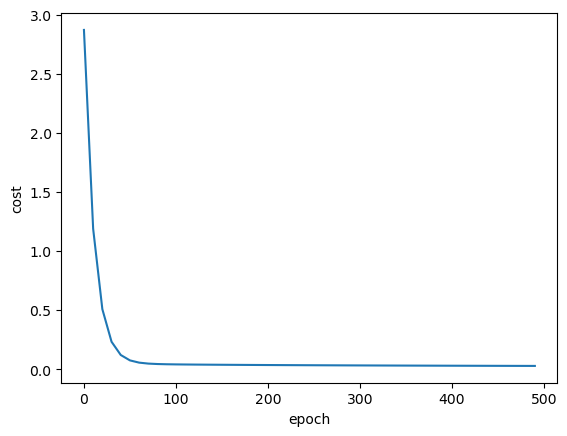

In [82]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [84]:
weights

array([0.4555004 , 0.72087764, 0.61528164, 0.39789765])

In [88]:
sx.transform([[1, 4.2, 50, 20]])[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.        , 1.        , 0.44444444, 0.        ])

In [93]:
sy.inverse_transform([[1,0.5,0.1,0]])

array([[100. ,  57.5,  23.5,  15. ]])

In [98]:
def predict(time, voltage, current, temperature, weights, bias):
    scaled_features = sx.transform([[time, voltage, current, temperature]])[0]
    
    #scaled_SOC = np.dot(weights, scaled_features.T) + bias
    scaled_SOC = weights[0]*scaled_features[0] + weights[1]*scaled_features[1] + weights[2]*scaled_features[2] + weights[3]*scaled_features[3]+ bias
    return sy.inverse_transform([[scaled_SOC]])[0][0]


In [99]:
predict(1, 4.2, 50, 25, weights, bias)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


64.56700751767883

In [100]:
predict(1, 4.0, 50, 25, weights, bias)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


52.312087690466946